Image Modeling

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [2]:
K.set_image_data_format('channels_first')

In [3]:
np.random.seed(0)

In [4]:
height = 28
width = 28
channels = 1

    1. Load the MNIST data set.

In [5]:
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [6]:
from matplotlib import pyplot as plt
import cv2

In [7]:
data_train = data_train.reshape(data_train.shape[0], channels, height, width)
data_test = data_test.reshape(data_test.shape[0], channels, height, width)
#load the data and reshape it

    2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

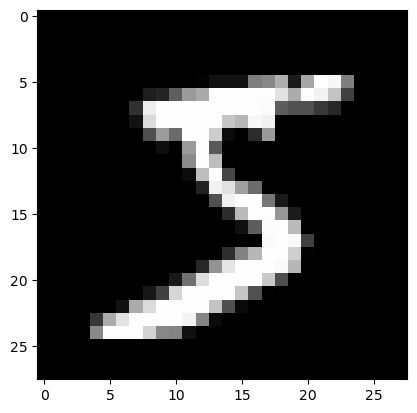

In [8]:
img = data_train[0].reshape(28,28)
plt.imshow(img, cmap='gray')

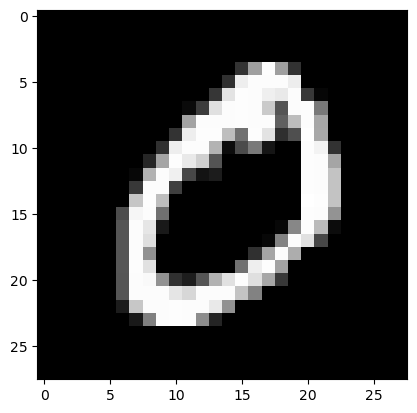

In [9]:
img = data_train[1].reshape(28,28)
plt.imshow(img, cmap='gray')

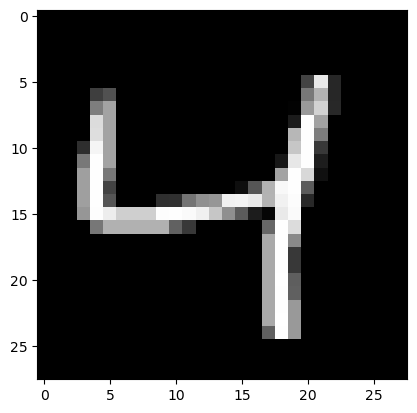

In [10]:
img = data_train[2].reshape(28,28)
plt.imshow(img, cmap='gray')

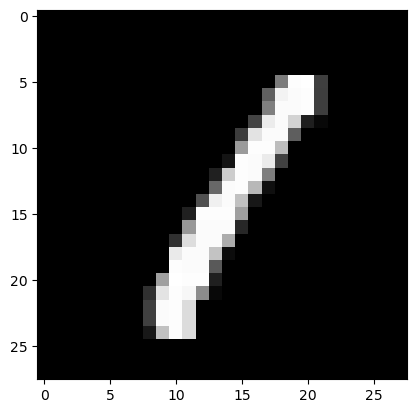

In [11]:
img = data_train[3].reshape(28,28)
plt.imshow(img, cmap='gray')

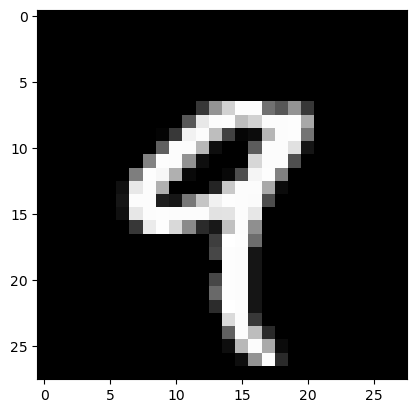

In [12]:
img = data_train[4].reshape(28,28)
plt.imshow(img, cmap='gray')

In [13]:
target_train[0:5]
#compare the first 5 images with 
#the first five labels

array([5, 0, 4, 1, 9], dtype=uint8)

The first five training images and first five training labels look correct.

    3. Build and train a Keras CNN classifier on the MNIST training set.

In [14]:
features_train = data_train/255
features_test = data_test/255
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]
network = Sequential()

In [15]:
network.add(Conv2D(filters=64, 
                  kernel_size=(5,5),
                  input_shape=(channels,width,height),
                  activation='relu'))

In [16]:
network.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
network.add(Dropout(0.5))

In [18]:
network.add(Flatten())

In [19]:
network.add(Dense(128, activation='relu'))

In [20]:
network.add(Dropout(0.5))

In [21]:
network.add(Dense(number_of_classes, activation='softmax'))

In [22]:
network.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [23]:
final = network.fit(features_train,
           target_train,
           epochs=10,
           verbose=0,
           batch_size=1000,
           validation_data=(features_test, target_test))
#build and fit the model to the dataset

In [24]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 24, 24)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 12, 12)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 12, 12)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

    4. Report the test accuracy of your model.

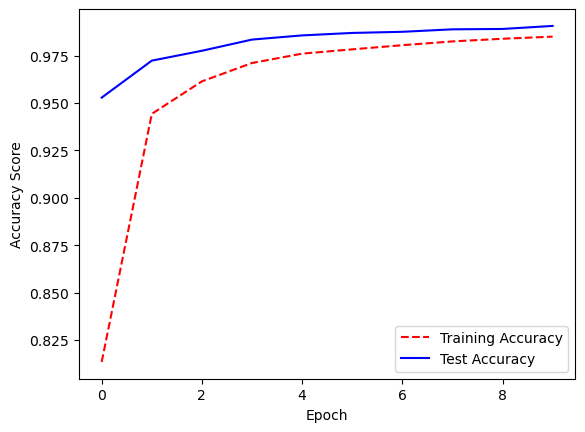

In [25]:
training_acc = final.history["accuracy"]
test_acc = final.history['val_accuracy']
plt.plot(training_acc, 'r--')
plt.plot(test_acc, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show()
#plot the accuracy of the model based on epoch

In [26]:
_, accuracy = network.evaluate(features_train, target_train)
print('Accuracy: %.2f' % (accuracy*100))
#accuracy of the model (epoch=10)

1875/1875 [==============================] - 19s 10ms/step - loss: 0.0212 - accuracy: 0.9939
Accuracy: 99.39


    5. Display a confusion matrix on the test set classifications.

In [27]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
y_pred = network.predict(data_test)
y_true = target_test

313/313 [==============================] - 3s 9ms/step


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
y_test_arg=np.argmax(y_true,axis=1)
Y_pred = np.argmax(y_pred,axis=1)
conf = confusion_matrix(y_test_arg, Y_pred)

<Axes: >

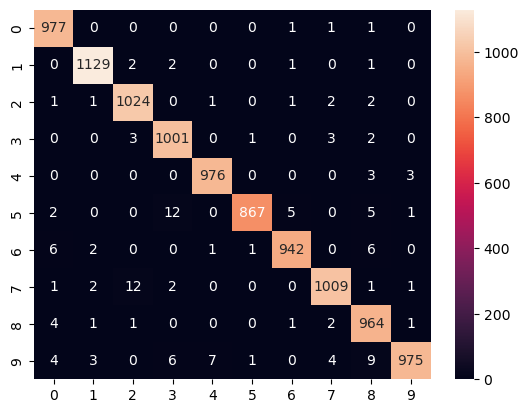

In [30]:
import seaborn as sns
sns.heatmap(conf, fmt='d', annot=True)
#print confusion matrix

    6. Summarize your results.

I decided to use ten epochs to see how the accuracy changes. As can be seen from the plotted graph above, the accuracy of this model starts to peak around 4-5 epochs for this dataset. Lowering the epoch count would save time in the future running this model. The confusion matrix shows that at 10 epochs, the model has very few false predictions. This is an acceptable model based on these summary outputs. 